# Heatmap Example

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
from matplotlib.patches import BoxStyle

from mpltable import ColDef, Table

In [2]:
cmap = LinearSegmentedColormap.from_list(
    name="BuYl", colors=["#01a6ff", "#eafedb", "#fffdbb", "#ffc834"], N=256
)

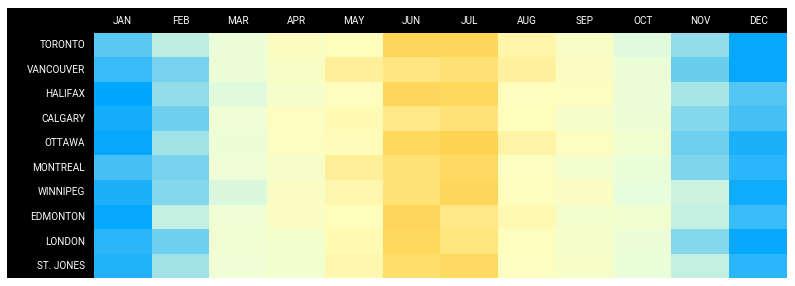

In [3]:
cities = [
    "TORONTO",
    "VANCOUVER",
    "HALIFAX",
    "CALGARY",
    "OTTAWA",
    "MONTREAL",
    "WINNIPEG",
    "EDMONTON",
    "LONDON",
    "ST. JONES",
]
months = [
    "JAN",
    "FEB",
    "MAR",
    "APR",
    "MAY",
    "JUN",
    "JUL",
    "AUG",
    "SEP",
    "OCT",
    "NOV",
    "DEC",
]

data = np.random.random((10, 12)) + np.abs(np.arange(12) - 5.5)
data = (1 - data / (np.max(data)))


d = pd.DataFrame(data, columns=months, index=cities).round(2)

fig, ax = plt.subplots(figsize=(14, 5))


column_definitions = [
    ColDef(name, cmap=cmap, formatter=lambda x: "") for name in months
] + [ColDef("index", title="", width=1.5, textprops={"ha": "right"})]

tab = Table(
    d,
    column_definitions=column_definitions,
    row_dividers=False,
    col_label_divider=False,
    textprops={"ha": "center", "fontname": "Roboto"},
    cell_kw={
        "edgecolor": "w",
        "linewidth": 0,
    },
)


tab.col_label_row.set_facecolor("k")
tab.col_label_row.set_fontcolor("w")
tab.columns["index"].set_facecolor("k")
tab.columns["index"].set_fontcolor("w")
tab.columns["index"].set_linewidth(0)


plt.show()


fig.savefig("images/calender.png", dpi=200)